### Exploração dos dados
A exploração dos dados convertidos em geojson será feito utilizando a lib [geopandas](https://geopandas.org/)

https://github.com/geopandas/geopandas

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
cwd = os.getcwd()
data_dir = 'malha_geometrica/converted_data'
sub_dirs = os.listdir(os.path.join(os.getcwd(), data_dir))

### Plot de um único estado

In [4]:
pr = gpd.read_file(os.path.join(data_dir, 'pr_municipios.json'))
pr = pr[pr.geometry.type == 'Polygon']

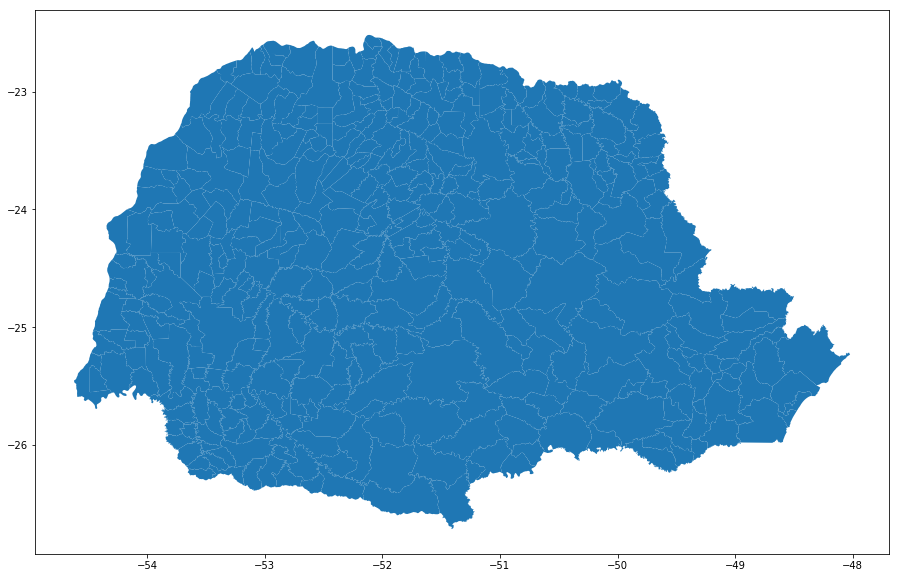

In [5]:
pr.plot()

### Merge de mais de 1 estado
*There are two ways to combine datasets in geopandas – attribute joins and spatial joins.
In an attribute join, a GeoSeries or GeoDataFrame is combined with a regular pandas Series or DataFrame based on a common variable. This is analogous to normal merging or joining in pandas.*

In [6]:
sc = gpd.read_file(os.path.join(data_dir, 'sc_municipios.json'))
sc = sc[sc.geometry.type == 'Polygon']

In [7]:
sc_pr = gpd.overlay(sc, pr, how='union')

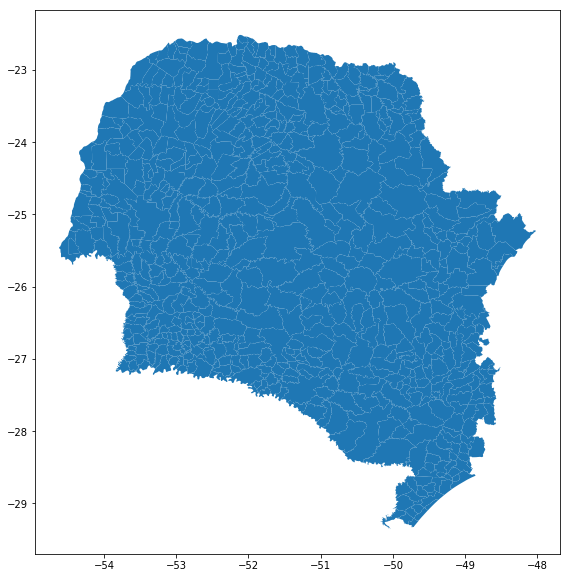

In [8]:
sc_pr.plot()

### Plot dos municípios do Sul

In [9]:
rs = gpd.read_file(os.path.join(data_dir, 'rs_municipios.json'))
# Dropa qualquer poligono que contém uma geometrica vazia, isso evita problemas ao unir demais frames.
rs = rs[rs.geometry.type == 'Polygon']

In [10]:
sul = gpd.overlay(sc_pr, rs, how='union')

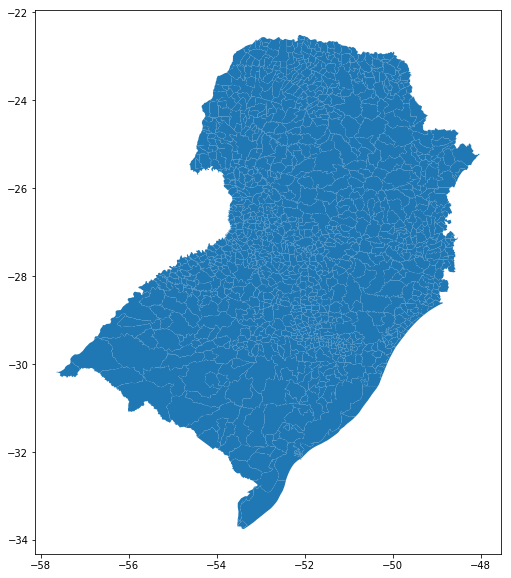

In [11]:
sul.plot()

### Carrega dados eleitorais do TSE

In [ ]:
# TODO